In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df = pd.read_excel('lab2.xlsx')

In [26]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [41]:
A = df.iloc[:,1:4]
A

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [15]:
C = df.iloc[:,4:5]
C

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [28]:
A.shape

(10, 4)

In [29]:
C.shape

(10, 1)

In [42]:
np.linalg.matrix_rank(A)

3

In [43]:
np.linalg.matrix_rank(C)

1

In [46]:
X = np.dot(np.linalg.pinv(A), C)
X

array([[ 1.],
       [55.],
       [18.]])

In [49]:
def classifyCust(x):
    if(x > 200):
        return 'RICH'
    else:
        return 'POOR'

In [50]:
df['Purchase Behavior'] = df['Payment (Rs)'].apply(classifyCust)

In [51]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Purchase Behavior
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


In [54]:
df2 = pd.read_excel('lab2.2.xlsx')

In [55]:
df2

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [62]:
df2['Price'].mean()

1560.6634538152612

In [64]:
df2['Price'].var()

58732.36535253922

In [69]:
def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')

In [71]:
df2['Date'] = df2['Date'].apply(mdy_to_ymd)
df2.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,2021-06-29,Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,2021-06-28,Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,2021-06-25,Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,2021-06-24,Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,2021-06-23,Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [73]:
parts = df2["Date"].str.split("-", n = 3, expand = True) 
df2["year"]= parts[0].astype('int') 
df2["month"]= parts[1].astype('int') 
df2["day"]= parts[2].astype('int') 
df2.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%,year,month,day
0,2021-06-29,Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020,2021,6,29
1,2021-06-28,Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043,2021,6,28
2,2021-06-25,Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020,2021,6,25
3,2021-06-24,Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026,2021,6,24
4,2021-06-23,Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023,2021,6,23


In [83]:
df2[df2['Day'] == 'Wed']['Price'].mean()

1550.7060000000001

In [84]:
df2[df2['Month'] == 'Apr']['Price'].mean()

1698.9526315789474

In [100]:
##numOfNegativeChg = (df2['Chg%']<0).sum().sum()
##totalObs = len(df2.index)
##totalObs
numOfNegativeChg = df2['Chg%'].apply(lambda x : 1 if x < 0 else 0).sum()
totalObs = len(df2.index)

In [101]:
probOfLoss = numOfNegativeChg/totalObs
probOfLoss

0.4979919678714859

In [105]:
numOfProfitWed = df2[df2['Day'] == 'Wed']['Chg%'].apply(lambda x : 1 if x > 0 else 0).sum()

In [106]:
probOfProfitWed = numOfProfitWed/totalObs
probOfProfitWed

0.08433734939759036

In [115]:
numOfWed = df2[df2['Day'] == 'Wed']['Chg%'].count()
numOfWed

50

In [116]:
consitionalProb = probOfProfitWed/(numOfWed/totalObs)
consitionalProb

0.42

<Axes: xlabel='Day', ylabel='Chg%'>

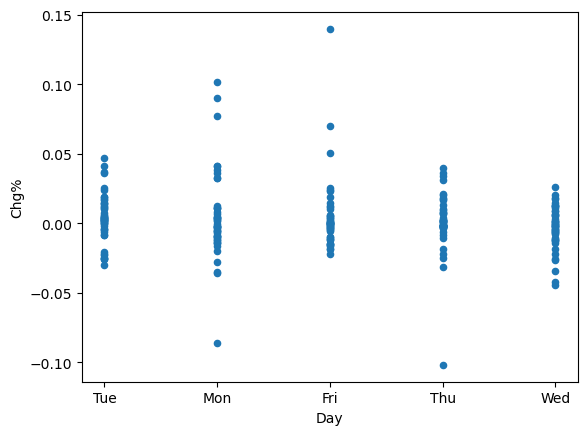

In [120]:
df2.plot.scatter(x = 'Day',
                y = 'Chg%'
                )

In [3]:
df3 = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df3.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


In [123]:
df3.describe()

,Record ID,age
count,9.172000e+03,9172.000000
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718
min,8.408010e+08,1.000000
25%,8.504090e+08,37.000000
50%,8.510040e+08,55.000000
75%,8.607110e+08,68.000000
max,8.701190e+08,65526.000000


In [124]:
df3.dtypes

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [128]:
df3.replace('?', np.nan, inplace=True)
df3.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [130]:
print("Number of missing values in each feature")
missing_values = df3.isnull().sum()
print(missing_values)

Number of missing values in each feature
Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG    


Outliers in Numeric Data:


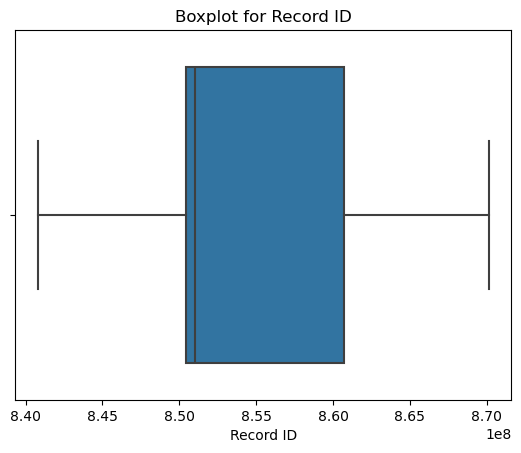

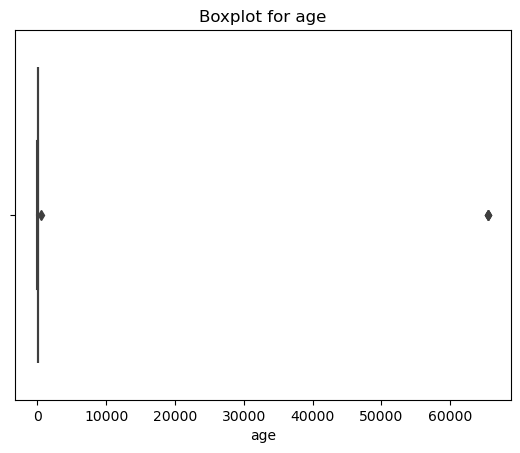

In [143]:
print("\nOutliers in Numeric Data:")
cat_cols = df3.select_dtypes(include=['object']).columns
num_cols = df3.select_dtypes(include=['int64']).columns
for i in num_cols:
    sns.boxplot(x=df3[i])
    plt.title("Boxplot for {}".format(i))
    plt.show()

In [141]:
for i in num_cols:
    print("Mean and std. deviation for", i, "is ", df3[i].mean()," and ", df3[i].std())

Mean and std. deviation for Record ID is  852947346.6122983  and  7581968.780346589
Mean and std. deviation for age is  73.55582206716092  and  1183.9767180444667


In [145]:
for i in num_cols:
    if df3[i].isnull().sum() > 0:
        if df3[i].skew() < 1:
            df3[i].fillna(df3[i].mean(), inplace=True)
            df3("Column: {}, Imputation Method: Mean".format(i))
        else:
            df3[i].fillna(df3[i].median(), inplace=True)
            print("Column: {}, Imputation Method: Median".format(i))

for i in cat_cols:
    if df3[i].isnull().sum() > 0:
        df3[i].fillna(df3[i].mode()[0], inplace=True)
        print("Column: {}, Imputation Method: Mode".format(i))
df3.head()

Column: sex, Imputation Method: Mode


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [4]:
scaler = StandardScaler()
df3['age'] = scaler.fit_transform(df3[['age']])
df3['age']

0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64

In [7]:
binary_cols = [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'M', 'F'}]

df3[binary_cols] = df3[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

v1 = df3.loc[0, binary_cols].astype(int)
v2 = df3.loc[1, binary_cols].astype(int)


f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

jc = f11 / (f01 + f10 + f11)
jc

0.25

In [8]:
smc = (f11 + f00) / (f00 + f01 + f10 + f11)
smc

0.85

In [17]:
binary_cols = [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'M', 'F'}]

df3[binary_cols] = df3[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

v1 = df3.loc[0, binary_cols].astype(int).values.reshape(1, -1)
v2 = df3.loc[1, binary_cols].astype(int).values.reshape(1, -1)
cos_sim = cosine_similarity(v1, v2)[0][0]
cos_sim

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by check_pairwise_arrays.